This notebook will mainly be used for my capstone project

In [61]:
import pandas as pd
import numpy as np

In [62]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


First thing we do is bring in the dataset and convert it into a dataframe

In [63]:
!wget -c Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-15 19:11:43--  http://data-collisions.csv/
Resolving data-collisions.csv (data-collisions.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘data-collisions.csv’
--2020-09-15 19:11:44--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [64]:
#checking out the dataframe
collisions_df = pd.read_csv('Data-Collisions.csv')

collisions_df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [65]:
#Exploring the dataset
print(collisions_df.dtypes)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [66]:
collisions_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [67]:
#Selecting the features that are relevant for our problem
rdf = collisions_df[['SEVERITYCODE','SEVERITYDESC','WEATHER','ROADCOND','LIGHTCOND','INCDTTM']]
rdf.head(10)

,SEVERITYCODE,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND,INCDTTM
0,2,Injury Collision,Overcast,Wet,Daylight,3/27/2013 2:54:00 PM
1,1,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM
2,1,Property Damage Only Collision,Overcast,Dry,Daylight,11/18/2004 10:20:00 AM
3,1,Property Damage Only Collision,Clear,Dry,Daylight,3/29/2013 9:26:00 AM
4,2,Injury Collision,Raining,Wet,Daylight,1/28/2004 8:04:00 AM
5,1,Property Damage Only Collision,Clear,Dry,Daylight,4/20/2019 5:42:00 PM
6,1,Property Damage Only Collision,Raining,Wet,Daylight,12/9/2008
7,2,Injury Collision,Clear,Dry,Daylight,4/15/2020 5:47:00 PM
8,1,Property Damage Only Collision,Clear,Dry,Daylight,6/15/2006 1:00:00 PM
9,2,Injury Collision,Clear,Dry,Daylight,3/20/2006 3:49:00 PM


In [68]:
#Renaming some columns to more appropriate labels
headers = ['Severity_code', 'Description', 'Weather', 'Road_Condition', 'Light_Condition', 'Date/Time']
rdf.columns = headers
rdf.head(10)

,Severity_code,Description,Weather,Road_Condition,Light_Condition,Date/Time
0,2,Injury Collision,Overcast,Wet,Daylight,3/27/2013 2:54:00 PM
1,1,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM
2,1,Property Damage Only Collision,Overcast,Dry,Daylight,11/18/2004 10:20:00 AM
3,1,Property Damage Only Collision,Clear,Dry,Daylight,3/29/2013 9:26:00 AM
4,2,Injury Collision,Raining,Wet,Daylight,1/28/2004 8:04:00 AM
5,1,Property Damage Only Collision,Clear,Dry,Daylight,4/20/2019 5:42:00 PM
6,1,Property Damage Only Collision,Raining,Wet,Daylight,12/9/2008
7,2,Injury Collision,Clear,Dry,Daylight,4/15/2020 5:47:00 PM
8,1,Property Damage Only Collision,Clear,Dry,Daylight,6/15/2006 1:00:00 PM
9,2,Injury Collision,Clear,Dry,Daylight,3/20/2006 3:49:00 PM


In [69]:
#Drop any NaN values in the columns
rdf = rdf.dropna(subset=['Severity_code', 'Description', 'Weather', 'Road_Condition', 'Light_Condition', 'Date/Time'], axis = 0)

In [70]:
print(rdf.dtypes)
print(rdf.shape)

Severity_code       int64
Description        object
Weather            object
Road_Condition     object
Light_Condition    object
Date/Time          object
dtype: object
(189337, 6)


In [74]:
#get rid of unknown & other values for road conditions, light conditions, and weather
unknown_otherRC = rdf[ (rdf['Road_Condition'] == 'Unknown') | (rdf['Road_Condition'] == 'Other')].index
unknown_otherW = rdf[ (rdf['Weather'] == 'Unknown')|(rdf['Weather'] == 'Other')].index
unknown_otherLC = rdf[ (rdf['Light_Condition'] == 'Unknown') | (rdf['Light_Condition'] == 'Other')].index


rdf.drop(unknown_otherRC,  inplace = True)
rdf.drop(unknown_otherW, inplace = True)
rdf.drop(unknown_otherLC, inplace = True)




In [75]:
convert_att = {'Road_Condition': {'Dry': 11, 'Wet':1, 'Ice': 2, 'Snow/Slush': 3, 'Standing Water': 4,
                                 'Sand/Mud/Dirt': 5, 'Oil': 6},
              'Weather': {'Clear': 11, 'Raining': 1, 'Overcast': 2, 'Snowing': 3, 'Fog/Smog/Smoke': 4, 
                         'Sleet/Hail/Freezing Rain': 5, 'Blowing Sand/Dirt': 8, 'Severe Crosswind': 9,
                         'Partly Cloudy': 10},
              'Light_Condition': {'Daylight': 11, 'Dark - Street Lights On': 1, 'Dusk': 2, 'Dawn': 3, 
                                 'Dark - No Street Lights': 4, 'Dark - Street Lights Off': 5, 'Dark - Unknown Lighting': 6}}

In [76]:
rdf['Light_Condition'].value_counts()

Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Dark - Unknown Lighting          8
Name: Light_Condition, dtype: int64

In [77]:
road_condition_count = rdf['Road_Condition'].value_counts().to_frame()
road_condition_count.rename(columns={'Road_Condition': 'Value_count'}, inplace = True)
road_condition_count.index.name = 'Road_Condition'
road_condition_count

,Value_count
Road_Condition,
Dry,121490
Wet,46324
Ice,1080
Snow/Slush,833
Standing Water,105
Sand/Mud/Dirt,65
Oil,60


In [78]:
Weather_count = rdf['Weather'].value_counts().to_frame()
Weather_count.rename(columns={'Weather': 'Value_count'}, inplace = True)
Weather_count.index.name = 'Weather'

Light_condition_count = rdf['Light_Condition'].value_counts().to_frame()
Light_condition_count.rename(columns={'Light_Condition': 'Value_count'}, inplace = True)
Light_condition_count.index.name = 'Light_Condition'

In [79]:
severity_count = rdf['Severity_code'].value_counts().to_frame()
severity_count.rename(columns={'Severity_code': 'Value_count'}, inplace = True)
severity_count.index.name = 'Severity_code'
severity_count


,Value_count
Severity_code,
1,114274
2,55683


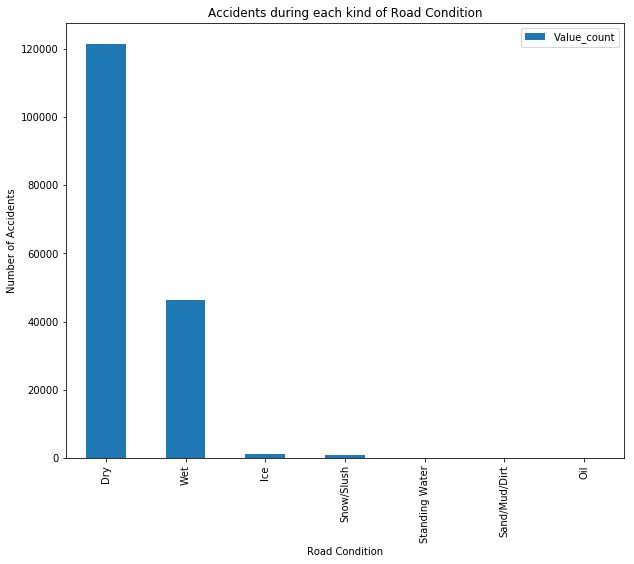

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt

road_condition_count.plot(kind = 'bar', figsize = (10,8))

plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents during each kind of Road Condition')
plt.show()


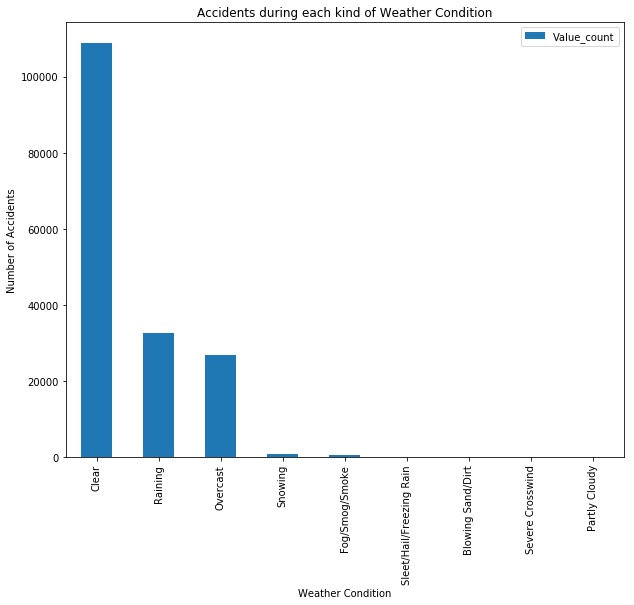

In [81]:
Weather_count.plot(kind = 'bar', figsize = (10,8))

plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents during each kind of Weather Condition')
plt.show()

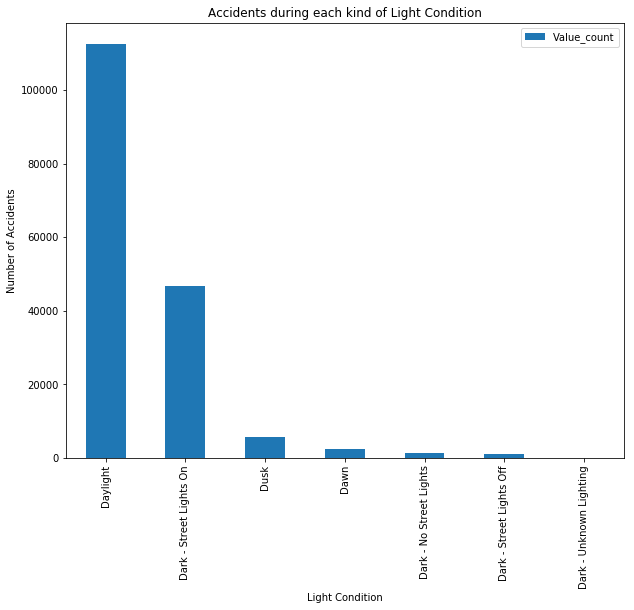

In [82]:
Light_condition_count.plot(kind = 'bar', figsize = (10,8))

plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents during each kind of Light Condition')
plt.show()

The biggest thing I notice about this dataset is that most of its values are object types which means this is largely a categorical variable dataset. In order for it to be more pratical to use in creating a model, I should convert the attributes into numerical variables.

In [83]:
#Because the data for the two severity are very skewed, it would be best to balance them out
#using the down-sampling method
from sklearn.utils import resample

rdf_majority = rdf[rdf.Severity_code == 1]
rdf_minority = rdf[rdf.Severity_code == 2]

rdf_majority_downsampled = resample(rdf_majority, replace = False, n_samples = 55683, random_state = 42)

rdf_downsampled = pd.concat([rdf_majority_downsampled, rdf_minority])

rdf_downsampled.Severity_code.value_counts()

2    55683
1    55683
Name: Severity_code, dtype: int64

In [84]:
rdf_attributes = rdf_downsampled[['Road_Condition', 'Weather', 'Light_Condition']]
y = rdf_downsampled['Severity_code'].values

In [85]:
#rdf_attributes = rdf_attributes.apply(pd.to_numeric)
#rdf_attributes.dtypes
print(rdf_attributes.iloc[[107204]])

       Road_Condition  Weather          Light_Condition
180749            Wet  Raining  Dark - Unknown Lighting


In [86]:
rdf_attributes.replace(convert_att, inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [87]:
X = rdf_attributes

Now We can do our analysis and choose the best type of model to use to solve our problem

In [88]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [89]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.63154045,  0.74680579,  0.70383286],
       [ 0.63154045,  0.74680579, -1.25922236],
       [-1.5954285 , -1.44003338, -1.47733961],
       [-1.5954285 , -1.22134946,  0.70383286],
       [ 0.63154045,  0.74680579, -1.47733961]])

In [90]:
#Creating training set, testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (89092, 3) (89092,)
Testing set:  (22274, 3) (22274,)


I will try a few different models and then test accuracy to see which model best fits the data

In [92]:
#K Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 30
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

print("The highest accuracy score was: ", mean_acc.max(), "where k = ", mean_acc.argmax() + 1)
    



The highest accuracy score was:  0.5152195384753524 where k =  14


In [93]:
neigh = KNeighborsClassifier(n_neighbors = 14).fit(X_train,y_train )
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [95]:
knn_test = neigh.predict(X_test)
knn_test[0:5]

array([2, 2, 2, 1, 2])

In [97]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
Tree.fit(X_train, y_train)

tree_test = Tree.predict(X_test)

print("DecisionTree Accuracy: ", metrics.accuracy_score(y_test, tree_test))

DecisionTree Accuracy:  0.5183622160366347


In [99]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression( C = 0.01, solver = 'liblinear').fit(X_train, y_train)

log_reg_test = log_reg.predict(X_test)
log_reg_testprob = log_reg.predict_proba(X_test)

log_reg_test[0:5]

array([2, 2, 2, 1, 2])

In [102]:
#Using Jaccard index, F1-score, I can determine which model is the most accurate
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

jaccardKNN = jaccard_similarity_score(y_test, knn_test)
jaccardDT = jaccard_similarity_score(y_test, tree_test)
jaccardLG = jaccard_similarity_score(y_test, log_reg_test)

f1_scoreKNN = f1_score(y_test, knn_test, average = 'weighted')
f1_scoreDT = f1_score(y_test, tree_test, average = 'weighted')
f1_scoreLG = f1_score(y_test, log_reg_test, average = 'weighted')

print('KNN Jaccard index: ', jaccardKNN, ' KNN F1 Score: ', f1_scoreKNN)
print('Decision Tree Jaccard index: ', jaccardDT, ' Decision Tree F1 Score: ', f1_scoreDT)
print('Logistic Regression Jaccard index: ', jaccardLG, ' Logistic Regression F1 Score: ', f1_scoreLG)

KNN Jaccard index:  0.5152195384753524  KNN F1 Score:  0.47913366273021396
Decision Tree Jaccard index:  0.5183622160366347  Decision Tree F1 Score:  0.4964389674445797
Logistic Regression Jaccard index:  0.514591002963096  Logistic Regression F1 Score:  0.5008013049948647


After looking at the similarity tests and f1 scores of the test models we see that all are similar in score. The Decision Tree seems to have the highest score albeit not by much. Therefore the best choice for machine learning model would be the decision tree.